In [5]:
pip install pandas numpy nltk textblob wordcloud matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation



In [9]:
# Load Data
df = pd.read_csv("Paneer.csv")  
print(df.head())



                                              Review
0  it's very old manufacturing date paneer....not...
1                      panner not that fresh, yellow
2  this is softest paneer in the ready made brand...
3  Has a strong sour taste like vinegar I did not...
4                          The paneer was reall good


In [11]:
# Preprocessing Function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    return text

df['cleaned_reviews'] = df['Review'].apply(clean_text)



In [23]:
# Initialize Sentiment Analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/prachethanmallemula/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
# Sentiment Analysis
df['sentiment_score'] = df['cleaned_reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

df['sentiment'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0.05 else 'Negative' if x < -0.05 else 'Neutral')



In [29]:
print(df['sentiment_score'])

0     -0.2411
1     -0.2411
2      0.3612
3      0.8074
4      0.4404
        ...  
281    0.0000
282   -0.4767
283    0.6369
284   -0.8974
285    0.4404
Name: sentiment_score, Length: 286, dtype: float64


In [31]:
#average sentimet score for the data.
average_sentiment_score = df['sentiment_score'].mean()
print("Average Sentiment Score:", average_sentiment_score)

Average Sentiment Score: 0.19970839160839163


/var/folders/8d/w_gnrm152kzg7cqf0lg3xr3w0000gn/T/ipykernel_22595/1989286421.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette='coolwarm')


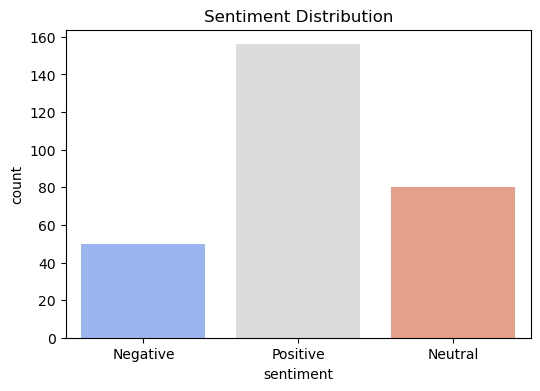

In [19]:
# 1. Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['sentiment'], palette='coolwarm')
plt.title('Sentiment Distribution')
plt.show()


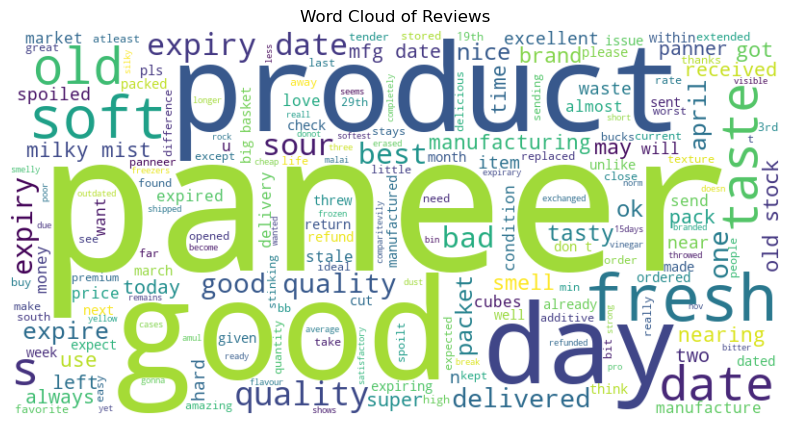

In [21]:
# 2. Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['cleaned_reviews']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()



/var/folders/8d/w_gnrm152kzg7cqf0lg3xr3w0000gn/T/ipykernel_22595/2351852515.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=word_freq, palette='viridis')


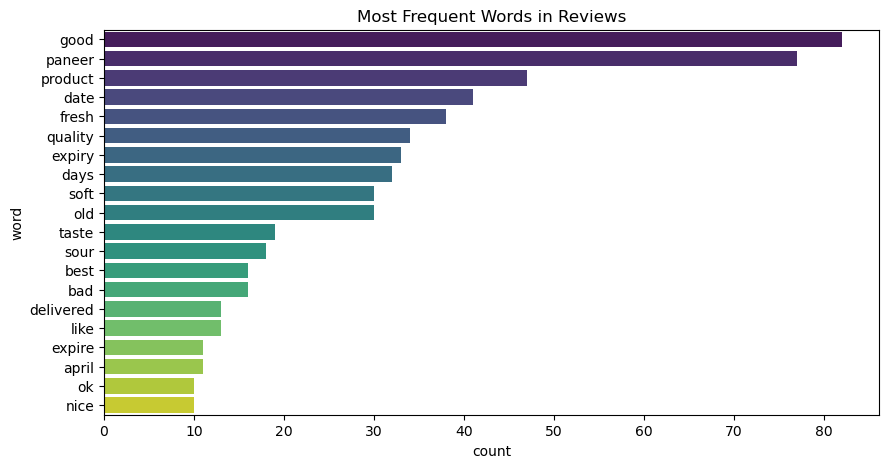

In [23]:
# 3. Keyword Frequency Analysis
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_reviews'])
word_freq = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': np.asarray(X.sum(axis=0)).ravel()})
word_freq = word_freq.sort_values(by='count', ascending=False).head(20)

plt.figure(figsize=(10,5))
sns.barplot(x='count', y='word', data=word_freq, palette='viridis')
plt.title('Most Frequent Words in Reviews')
plt.show()



In [33]:
# Sentiment vs Rating Analysis
if 'Rating' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df['Rating'], y=df['sentiment_score'], palette='coolwarm')
    plt.title('Sentiment Score vs Ratings')
    plt.show()



In [31]:
# Topic Modeling (LDA)
num_topics = 3  # Adjust as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
X_topics = lda.fit_transform(X)

terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Topic {i+1}: ", [terms[i] for i in topic.argsort()[:-6:-1]])



Topic 1:  ['old', 'paneer', 'best', 'product', 'ok']
Topic 2:  ['paneer', 'date', 'product', 'soft', 'april']
Topic 3:  ['good', 'fresh', 'days', 'expiry', 'paneer']


In [56]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



In [58]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /Users/arya/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/arya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
# Ensure the dataframe exists
if 'df' not in locals():
    raise ValueError("The dataframe 'df' is not defined. Please load your dataset first.")

# Check if 'sentiment' column exists
if 'sentiment' not in df.columns:
    raise KeyError("The column 'sentiment' is missing from the dataset. Check the column names using df.columns")

# Filter negative reviews
negative_reviews = df[df['sentiment'] == 'Negative']

# Ensure there are negative reviews before proceeding
if negative_reviews.empty:
    raise ValueError("No negative reviews found in the dataset.")

# Convert to text
all_negative_text = " ".join(negative_reviews['Review'].astype(str))

# Print a sample to verify
print(all_negative_text[:500])  # Show first 500 characters of negative reviews


it's very old manufacturing date paneer....not fresh one panner not that fresh, yellow Very poor quality (may be old stock) need return of money product is already 10 days old from the date of manufacturing... it's not fresh. same old product.. not fresh.. within next 2 days its gonna expire the paneer was sour and hard the paneer was not fresh and was close to expire it's not fresh, expiry shows nov but smells bad n taste is very bad. throwed in dust bin paneer was bitter. donot buy this cheap 


In [66]:
# Combine all negative reviews into one text
all_negative_text = " ".join(negative_reviews['Review'].astype(str))




In [68]:
# Tokenize and remove stopwords
words = word_tokenize(all_negative_text.lower())
filtered_words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]



In [70]:
# Count word frequency
word_freq = Counter(filtered_words)
top_words = dict(word_freq.most_common(20))  # Get top 20 words


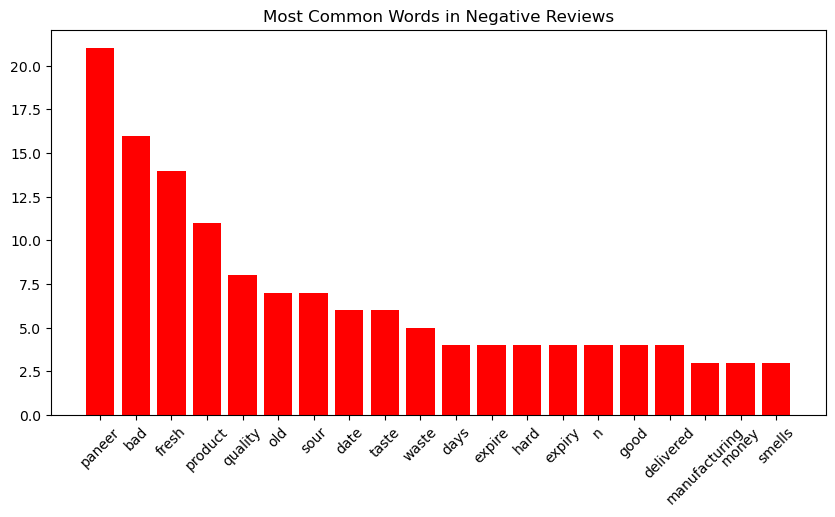

In [72]:

# Plot bar chart
plt.figure(figsize=(10,5))
plt.bar(top_words.keys(), top_words.values(), color='red')
plt.xticks(rotation=45)
plt.title("Most Common Words in Negative Reviews")
plt.show()

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation



In [76]:
# Convert negative reviews to a matrix of token counts
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(negative_reviews['Review'].astype(str))



In [78]:
# Apply LDA with 3 topics (adjustable)
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)



LatentDirichletAllocation(n_components=3, random_state=42)

In [80]:
# Display top words for each topic
feature_names = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx+1}: {', '.join([feature_names[i] for i in topic.argsort()[:-6:-1]])}")


Topic 1: product, sour, taste, good, paneer
Topic 2: fresh, bad, paneer, old, quality
Topic 3: paneer, hard, quality, packs, money
